# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [12]:
import sys
sys.version
!python3 -m pip install matplotlib pandas

     |████████████████████████████████| 11.6 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 1.2 MB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 1.2 MB 1.1 MB/s eta 0:00:01


In [332]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from IPython.display import display, clear_output 

array([[ 1.        , -1.71481604],
       [ 1.        , -1.68017329],
       [ 1.        , -1.64553055],
       [ 1.        , -1.6108878 ],
       [ 1.        , -1.57624505],
       [ 1.        , -1.5416023 ],
       [ 1.        , -1.50695955],
       [ 1.        , -1.4723168 ],
       [ 1.        , -1.43767406],
       [ 1.        , -1.40303131],
       [ 1.        , -1.36838856],
       [ 1.        , -1.33374581],
       [ 1.        , -1.29910306],
       [ 1.        , -1.26446031],
       [ 1.        , -1.22981757],
       [ 1.        , -1.19517482],
       [ 1.        , -1.16053207],
       [ 1.        , -1.12588932],
       [ 1.        , -1.09124657],
       [ 1.        , -1.05660382],
       [ 1.        , -1.02196108],
       [ 1.        , -0.98731833],
       [ 1.        , -0.95267558],
       [ 1.        , -0.91803283],
       [ 1.        , -0.88339008],
       [ 1.        , -0.84874733],
       [ 1.        , -0.81410459],
       [ 1.        , -0.77946184],
       [ 1.        ,

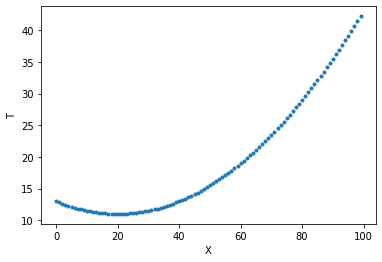

In [197]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

x_mean = np.mean(X, axis = 0)
x_std = np.std(X, axis = 0)
x_mean, x_std

X = (X - x_mean)/ x_std
np.mean(X, axis = 0), np.std(X, axis=0)
X = np.insert(X, 0, 1, 1)
X

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [349]:
def train(X, T, learning_rate, n_epochs, verbose=False):

    # Calculate means and standard deviations of each column in X and T
    # mean
    x_mean = np.mean(X, axis = 0)
    x_std = np.std(X, axis = 0)
    
    
    t_mean = np.mean(T, axis = 0)
    t_std = np.std(T, axis = 0)

    
    # Use the means and standard deviations to standardize X and T
    X = (X - x_mean)/ x_std
    T = (T - t_mean)/ t_std

    # Insert the column of constant 1's as a new initial column in X
    
    X1 = np.insert(X, 0, 1, 1)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    
    n_samples, n_inputs = X1.shape
    w = np.zeros((n_inputs, 1))
    
    ws = [w.copy()]
    sample_rmse_list = []
    
    fig = plt.figure(figsize=(8, 8))
    
    for epoch in range(n_epochs):
        sqerror_list = []

        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            y = X1[n:n+1, : ] @ w
            # calculate the error, and
            error = T[n:n+1, :] - y  
            #error = y - T[n:n+1, :]
            # update the weight values.
            w += learning_rate * X1[n:n+1, :]. T * error
            
            # Add the squared error to sqerror_sum
            sqerror_list.append(error ** 2)
            
            ws.append(w.copy())
            
            if n % 40 == 0:
                
                
                fig.clf()
                
                # Plot the X and T data.
                plt.subplot(2, 1, 1)
                plt.plot(X, T, 'o', alpha=0.6, label='Data')
                plt.plot(X[n], T[n], 'ko', ms=10, label='Last Trained Sample')
                plt.plot(X, X1 @ w, 'r-', linewidth=5, label='Model')
                
                '''
                # Plot the output of our linear model for a range of x values
                plt.plot(X_copy, X1 @ w, 'r-', linewidth=5, label='Model')
                plt.xlabel('$x$')
                plt.legend(loc='upper right')
                plt.xlim(0, 10)
                plt.ylim(0, 5)
                '''
                
               
                plt.subplot(2, 1, 2)
                plt.plot(np.array(ws)[:, :, 0])
                plt.xlabel('Updates')
                plt.xlim(0, n_epochs * n_samples)
                plt.ylim(-1, 3)
                plt.legend(('$w_0$', '$w_1$'))
        
                #clear_output(wait=True)
                #display(fig)
        '''   
        plt.subplot(3,1,3)
        sample_rmse_list.append(np.sqrt(sum(sqerror_list) / n_samples))
        plt.plot(np.array(sample_rmse_list)[:,:,0],  label = "RMSE")
        plt.xlabel('Epochs')
        plt.xlim(0, n_epochs)
        plt.ylim(-1, 2)
        clear_output(wait=True)
        display(fig)
        '''
        
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sum(sqerror_list) / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')
            
        
            

    return {'w': w, 'Xmeans': x_mean, 'Xstds': x_std, 'Tmeans': t_mean, 'Tstds': t_std}

In [329]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans'])/ model['Xstds']
    X = np.insert(X, 0, 1, 1)
    # Predict output values using weights in model
    pred_val = X @ model['w']
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    pred_val = ( pred_val * model['Tstds']) + model['Tmeans']
    
    # Return the unstandardized output values
    return pred_val

In [341]:
def rmse(A, B):
    # return round(np.mean(np.sqrt(((A - B) ** 2)), axis=0)[0], 4)
    return (np.sqrt((A - B) ** 2).mean())

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

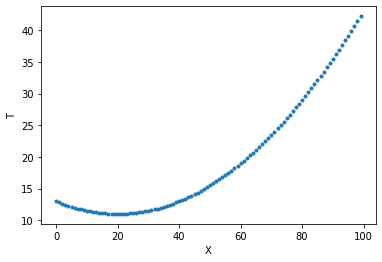

In [324]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2 #original
#T = -0.8 - 0.04 * X  + 0.003 * (X - 2)**3 #test
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

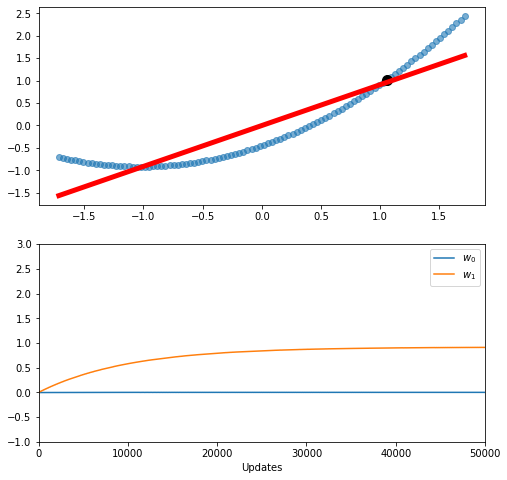

Epoch 500 RMSE 0.40


{'w': array([[5.27086555e-05],
        [9.11370918e-01]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938])}

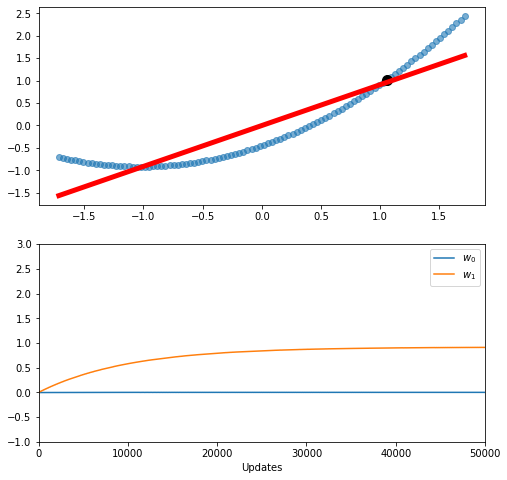

In [313]:
model = train(X, T, 0.0001, 500, verbose=True)
model

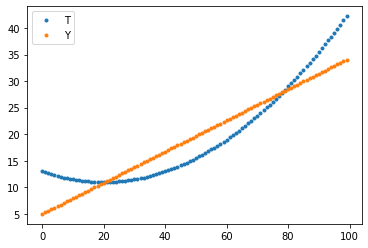

In [314]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

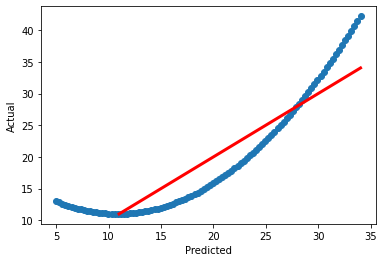

In [315]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [174]:
df = pandas.read_csv('A1_data.txt', delim_whitespace=True, na_values='***')
print(df.head)

<bound method NDFrame.head of      Year  Mo  Dy    tave    tmax   mxtm    tmin   mntm     vp  rhmax  ...  \
0    2019   1   1 -13.535 -10.073  14:10 -16.997  23:50  0.153  0.830  ...   
1    2019   1   2  -5.791   6.010  14:50 -17.591  04:00  0.209  0.839  ...   
2    2019   1   3   1.374  13.444  13:50 -10.696  05:00  0.340  0.836  ...   
3    2019   1   4   4.544  15.089  14:40  -6.000  06:00  0.429  0.815  ...   
4    2019   1   5   4.465  14.441  12:50  -5.510  06:40  0.399  0.769  ...   
..    ...  ..  ..     ...     ...    ...     ...    ...    ...    ...  ...   
360  2019  12  27  -1.493   2.260  14:40  -5.245  07:30  0.403  0.908  ...   
361  2019  12  28  -2.695  -1.102  01:50  -4.288  07:00  0.363  0.973  ...   
362  2019  12  29  -3.731   1.871  13:30  -9.333  22:40  0.221  0.690  ...   
363  2019  12  30  -5.427   1.293  13:40 -12.147  06:20  0.226  0.833  ...   
364  2019  12  31  -4.175   4.810  13:10 -13.160  06:50  0.247  0.862  ...   

    st15mx  st15mxtm st15mn  st15

## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [175]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [176]:
df.columns[df.isna().any()].tolist()

['st5mx', 'st5mxtm', 'st5mn', 'st5mntm', 'volts', 'gusdir']

In [177]:
df.drop(df.columns[df.isna().any()], axis = 1, inplace=True)

In [178]:
df.columns

Index(['Year', 'Mo', 'Dy', 'tave', 'tmax', 'mxtm', 'tmin', 'mntm', 'vp',
       'rhmax', 'rhmxtm', 'rhmin', 'rhmntm', 'sr', 'wrun', 'pp', 'st15mx',
       'st15mxtm', 'st15mn', 'st15mntm', 'year', 'gust', 'gusttm', 'etr_asce'],
      dtype='object')

In [179]:
df.isna().sum()

Year        0
Mo          0
Dy          0
tave        0
tmax        0
mxtm        0
tmin        0
mntm        0
vp          0
rhmax       0
rhmxtm      0
rhmin       0
rhmntm      0
sr          0
wrun        0
pp          0
st15mx      0
st15mxtm    0
st15mn      0
st15mntm    0
year        0
gust        0
gusttm      0
etr_asce    0
dtype: int64

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

### Note - Try with different features after done with assignment

In [189]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next_tave']

df['next_tave'] = df['tave']

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [192]:
X = df[Xnames].to_numpy()[:-1, :]
print(X.shape)

T = df[Tnames].to_numpy()[1:, :]
print(T.shape)

(364, 8)
(364, 1)


## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.


======================= Code Execution =======================

Extracting python code from notebook named 'bhosale-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


---  0/10 points. Returned incorrect values. err should be
0.0176
                       Your values are
0.01548245301359504

cs445 Execution Grade

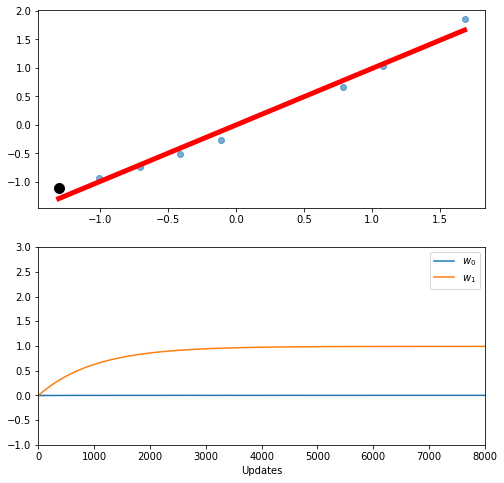

In [350]:
%run -i A1grader.py

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [ ]:
T = data[1:, 0:1] -  data[:-1, 0:1]

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.